Project Description

Los Angeles, California, attracts people from all over the world, offering lots of opportunities, not always of the good kind!

In this project, you'll serve as a data detective, supporting the Los Angeles Police Department (LAPD) in analyzing crime data to guide how they should allocate resources to protect the people of their city!

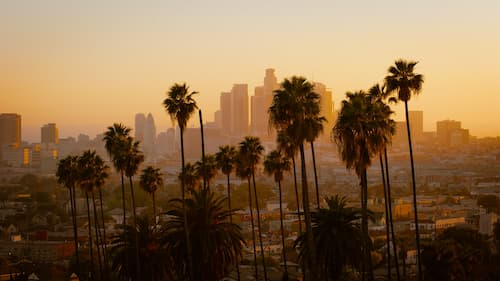

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [26]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Import DataFrame
crimes = pd.read_csv(r"C:\Users\NEW USER\Downloads\Analyzing Crime in Los Angeles\crimes.csv")
crimes.head()
# Check data types
print(crimes.dtypes)
# Convert date reported and date of occurence to datetime
crimes["Date Rptd"]=pd.to_datetime(crimes["Date Rptd"])
crimes["DATE OCC"]=pd.to_datetime(crimes["DATE OCC"])


DR_NO            int64
Date Rptd       object
DATE OCC        object
TIME OCC         int64
AREA NAME       object
Crm Cd Desc     object
Vict Age         int64
Vict Sex        object
Vict Descent    object
Weapon Desc     object
Status Desc     object
LOCATION        object
dtype: object


### Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

12


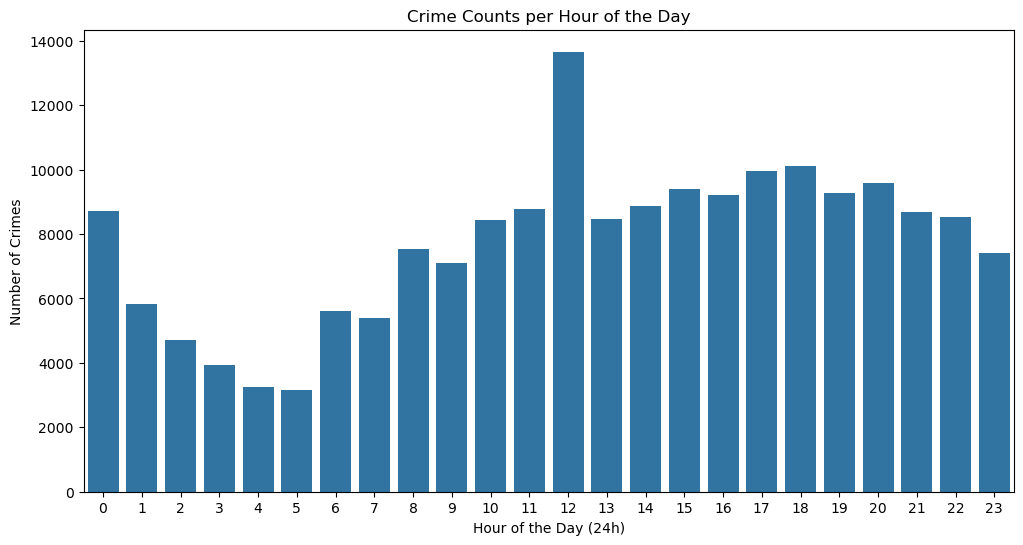

In [28]:
# Extract the first two characters of "TIME OCC" and convert to integer
crimes["HOUR OCC"] = crimes["TIME OCC"].astype(str).str.zfill(4).str[:2].astype(int)

# Find the hour with the highest number of crimes
peak_crime_hour = crimes["HOUR OCC"].value_counts().idxmax()
print(peak_crime_hour)

plt.figure(figsize=(12,6))
sns.countplot(data=crimes, x="HOUR OCC", order=sorted(crimes["HOUR OCC"].unique()))
plt.title("Crime Counts per Hour of the Day")
plt.xlabel("Hour of the Day (24h)")
plt.ylabel("Number of Crimes")
plt.show()


### Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.

Area with most night crimes: Central

Top 5 areas with most night crimes:

AREA NAME
Central        5430
77th Street    4081
Hollywood      3947
Southwest      3861
Olympic        3497
Name: DR_NO, dtype: int64


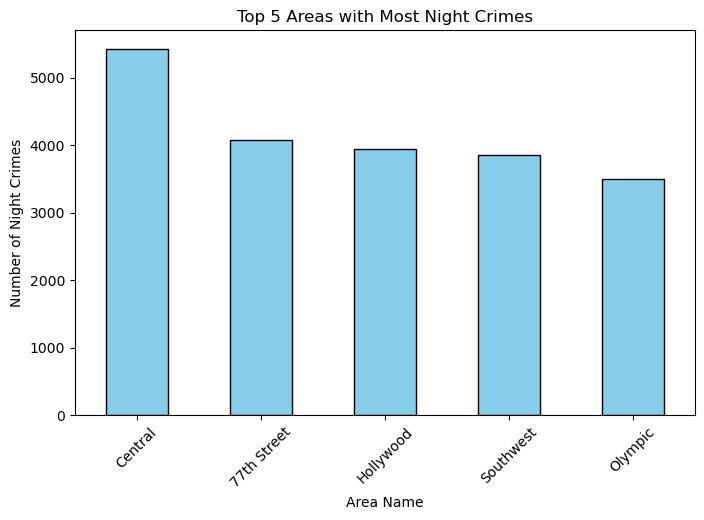

In [29]:
# Make sure TIME OCC is treated as hour (take first 2 digits)
crimes["HOUR OCC"] = crimes["TIME OCC"].astype(str).str.zfill(4).str[:2].astype(int)

# Define night hours (8pm to 5am)
night_hours = list(range(20, 24)) + list(range(0, 6))  # [20, 21, 22, 23, 0, 1, 2, 3, 4, 5]

# Subset only night crimes
night_crimes = crimes[crimes["HOUR OCC"].isin(night_hours)]

# Count crimes per area
crime_counts = night_crimes.groupby("AREA NAME")["DR_NO"].count().sort_values(ascending=False)

# Get the area with the most night crimes
peak_night_crime_location = crime_counts.index[0]

print("Area with most night crimes:", peak_night_crime_location)

# Top 5 areas with most night crimes
top_5_night_crime_areas = crime_counts.head(5)
print("\nTop 5 areas with most night crimes:\n")
print(top_5_night_crime_areas)

# Plot bar chart
plt.figure(figsize=(8, 5))
top_5_night_crime_areas.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 5 Areas with Most Night Crimes")
plt.xlabel("Area Name")
plt.ylabel("Number of Night Crimes")
plt.xticks(rotation=45)
plt.show()

### Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

Age Bracket
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64


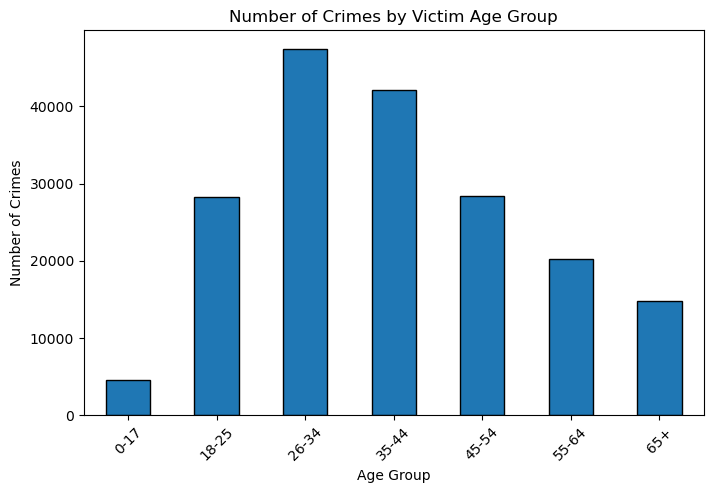

In [30]:
# Make "boxes" for the ages (bins)
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]

# Give each box a "name" (labels)
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Put every victim into the right box based on their age
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels, right=True)

# Count how many victims are in each box
victim_ages = crimes["Age Bracket"].value_counts().reindex(age_labels)

# Show the result
print(victim_ages)

# Plot a bar chart
plt.figure(figsize=(8, 5))
victim_ages.plot(kind="bar", edgecolor="black")

plt.title("Number of Crimes by Victim Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)  # tilt the labels so they fit nicely
plt.show()